Supervised classification problem

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from  sklearn.naive_bayes import GaussianNB
from  sklearn.naive_bayes import MultinomialNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, v_measure_score, calinski_harabasz_score, r2_score, roc_curve, plot_roc_curve, silhouette_score
from  sklearn.metrics import auc,roc_curve

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [ ]:
preds = pd.read_csv("./results/DEC/dec_cluster_assignments_5.csv")
y_pred = preds.cluster

(array([473.,   0., 432.,   0.,   0., 478.,   0., 345.,   0.,  73.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

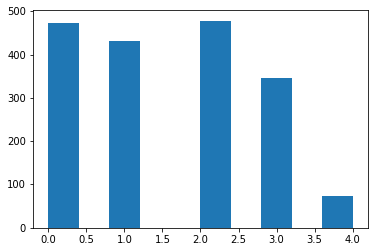

In [ ]:
plt.hist(y_pred)

Class imbalance posses a possible need for data over-sampling

In [ ]:
# # import library
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# x_ros, y_ros = ros.fit_resample(data, y_pred)

# # fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)

# plt.hist(y_ros)

In [ ]:
X = data
y = y_pred

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Training different classifiers. Obtaining best parameters using Grid Search Cross Validation.

In [ ]:
Class = []
Best_Parameters = []
Precision = []
Recall= []
Accuracy = []
F1 = []
Balanced_Acc = []
Kappa = []
Confusion_Matrix = []
#with scale
grid = {"n_neighbors" : [1, 2, 3, 5, 6, 7, 10, 15] }
KNN = KNeighborsClassifier()
gs = GridSearchCV(KNN , param_grid=grid, verbose=0)
gs.fit(X_train,y_train)
print("K Neighbors Classifier")
print("best_params:",gs.best_params_)
print("score:",gs.best_score_)

y_prd = gs.predict(X_test)
Class.append("KNN")
Best_Parameters.append(gs.best_params_)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Accuracy.append(accuracy_score(y_test, y_prd))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd))

K Neighbors Classifier
best_params: {'n_neighbors': 7}
score: 0.8595238095238095


In [ ]:

LDA = LinearDiscriminantAnalysis()
grid = {"solver": ["svd", "lsqr", "eigen"]}

gs = GridSearchCV(LDA , param_grid=grid, verbose=0)
gs.fit(X_train,y_train)
print("Linear Discriminant Analysis")
print("best_params:",gs.best_params_)
print("score:",gs.best_score_)

y_prd = gs.predict(X_test)
Class.append("LDA")
Best_Parameters.append(gs.best_params_)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
Accuracy.append(accuracy_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd))

Linear Discriminant Analysis
best_params: {'solver': 'svd'}
score: 0.9349206349206348


In [ ]:

GNB = GaussianNB()
grid = {"var_smoothing":[0,1e-5,1e-6,1e-7, 1e-8, 1e-9, 1e-10]}

gs = GridSearchCV(GNB , param_grid=grid, verbose=0)
gs.fit(X_train,y_train)
print("Gaussian NB")
print("best_params:",gs.best_params_)
print("score:",gs.best_score_)

y_prd = gs.predict(X_test)
Class.append("GNB")
Best_Parameters.append(gs.best_params_)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
Accuracy.append(accuracy_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd))

Gaussian NB
best_params: {'var_smoothing': 0}
score: 0.8984126984126984


In [ ]:
LR = LogisticRegression()
grid = {"penalty" : ["l1", "l2", "elasticnet", "none"]}

gs = GridSearchCV(LR, param_grid=grid, verbose=0)
gs.fit(X_train,y_train)
print("Logistic Regression")
print("best_params:",gs.best_params_)
print("score:",gs.best_score_)

y_prd = gs.predict(X_test)
Class.append("LR")
Best_Parameters.append(gs.best_params_)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
Accuracy.append(accuracy_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd))

Logistic Regression
best_params: {'penalty': 'l2'}
score: 0.9507936507936507


In [ ]:

svc = SVC() 
grid = { "gamma": [0.01, 0.1], 'kernel':['poly', 'sigmoid']}

gs = GridSearchCV(svc, param_grid=grid, verbose=0)
gs.fit(X_train,y_train)
print("SVC")
print("best_params:",gs.best_params_)
print("score:",gs.best_score_)

y_prd = gs.predict(X_test)
Class.append("SVC")
Best_Parameters.append(gs.best_params_)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
Accuracy.append(accuracy_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd)) 

SVC
best_params: {'gamma': 0.01, 'kernel': 'sigmoid'}
score: 0.9365079365079364


In [ ]:

DTC = DecisionTreeClassifier()
grid = {"criterion": ["gini", "entropy"], "splitter":["best", "random"], "max_depth": [4,6,8,10,12,20],       }
gs = GridSearchCV(DTC, param_grid=grid, verbose=0)
gs.fit(X_train,y_train)
print("Decision Tree Classifier")
print("best_params:",gs.best_params_)
print("score:",gs.best_score_)

y_prd = gs.predict(X_test)
Class.append("DTC")
Best_Parameters.append(gs.best_params_)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
Accuracy.append(accuracy_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd))

Decision Tree Classifier
best_params: {'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
score: 0.861111111111111


In [ ]:
RF = RandomForestClassifier()
grid = {"criterion": ["gini", "entropy"], "max_depth": [4,6,8,10,12,20]}
gs = GridSearchCV(RF, param_grid=grid, verbose=0)
gs.fit(X_train, y_train)
print("Random Forest Classifier")
print("best_params:",gs.best_params_)
print("score:",gs.best_score_)

y_prd = gs.predict(X_test)

Class.append("RF")
Best_Parameters.append(gs.best_params_)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
Accuracy.append(accuracy_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd))


Random Forest Classifier
best_params: {'criterion': 'gini', 'max_depth': 12}
score: 0.9174603174603174


In [ ]:
labels = list(range(5))

f1_scores = f1_score(y_test, y_prd, average=None, labels=labels)
f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}

In [ ]:
f1_scores_with_labels

{0: 0.9565217391304347,
 1: 0.9736842105263158,
 2: 0.9547038327526133,
 3: 0.9181818181818182,
 4: 0.9166666666666666}

(array([152.,   0., 117.,   0.,   0., 151.,   0., 104.,   0.,  17.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

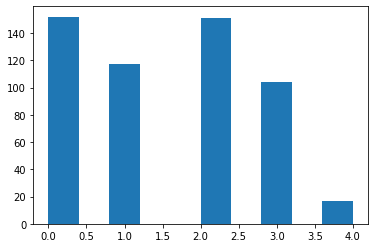

In [ ]:
plt.hist(y_prd)

In [ ]:

BG = BaggingClassifier()
grid = {"bootstrap": [True, False]}
gs = GridSearchCV(BG, param_grid=grid, verbose=0)
gs.fit(X_train,y_train)
print("Bagging Classifier")
print("best_params:",gs.best_params_)
print("score:",gs.best_score_)

y_prd = gs.predict(X_test)

Class.append("BG")
Best_Parameters.append(gs.best_params_)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
Accuracy.append(accuracy_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd))


Bagging Classifier
best_params: {'bootstrap': True}
score: 0.884920634920635


In [ ]:
AD = AdaBoostClassifier()
grid = {"learning_rate": [-0.5,0,0.5,1], "algorithm" : ["SAMME", "SAMME.R"] , "n_estimators":[25, 50, 100,150]}
gs = GridSearchCV(AD , param_grid=grid, verbose=0)
gs.fit(X_train,y_train)
print("Ada Boost")
print("best_params:",gs.best_params_)
print("score:",gs.best_score_)

y_prd = gs.predict(X_test)

Class.append("AD")
Best_Parameters.append(gs.best_params_)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
Accuracy.append(accuracy_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd))

Ada Boost
best_params: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 50}
score: 0.8936507936507937


MLP classifier

In [ ]:
import torch

X_train  = torch.Tensor(X_train)
X_test  = torch.Tensor(X_test)

y_train  = torch.Tensor(y_train)
y_test  = torch.Tensor(y_test.values)

y_train = y_train.long()
y_test =  y_test.long()

In [ ]:
class MLPNet(torch.nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = torch.nn.Linear(84, 64) 
        self.act1 = torch.nn.ReLU() 
        self.fc3 = torch.nn.Linear(64, 32) 
        self.act3 = torch.nn.ReLU() 
        self.fc4 = torch.nn.Linear(32, 10) 
        self.net = torch.nn.Softmax(1)

    
 
    def forward(self, x):
        x1 = self.act1(self.fc1(x))
        x2 = self.act3(self.fc3(x1))
        out = self.net(self.fc4(x2))
        return out
     
        
model = MLPNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) ##Adam, dif lr, try smaller
loss = torch.nn.CrossEntropyLoss() ##weighted classes


In [ ]:
model.parameters

<bound method Module.parameters of MLPNet(
  (fc1): Linear(in_features=84, out_features=64, bias=True)
  (act1): ReLU()
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (net): Softmax(dim=1)
)>

In [ ]:
batch_size = 32
num_samples, num_features = X_train.shape
num_batches = int(num_samples / batch_size)
order = np.arange(num_samples)
avg_train_loss = []
avg_test_loss = []
avg_all_loss = []
for epoch in range(100):
    np.random.shuffle(order)  ##non random, equiclass batches**
    minibatches = np.array_split(order, num_batches)
    train_loss_ls = []
    test_loss_ls = []
    all_loss_ls = []
    for j in range(num_batches):
        batch = minibatches[j]
        # Set model to training mode and reset gradient
        model.train()
        model.zero_grad()
        # optimizer.zero_grad()
        # Make model prediction using current batch data
        y_prd = model(X_train[batch]).squeeze()
        # compute_loss
        train_loss = loss(y_prd,  y_train[batch])
        train_loss_ls.append(train_loss.item())
        # compute_gradient
        train_loss.backward()
        # Step into gradient descent direction. Perform parameter update
        optimizer.step()

        with torch.no_grad():
                model.eval()
                test_loss = loss(model(X_test).squeeze(), y_test)
                test_loss_ls.append(test_loss.item())
                all_loss = train_loss.item() + test_loss.item()
                all_loss_ls.append(all_loss)
        
    
    avg_train_loss.append(np.mean(train_loss_ls))
    avg_test_loss.append(np.mean(test_loss_ls))
    avg_all_loss.append(np.mean(all_loss_ls))




In [ ]:
plt.plot(range(100), avg_train_loss)

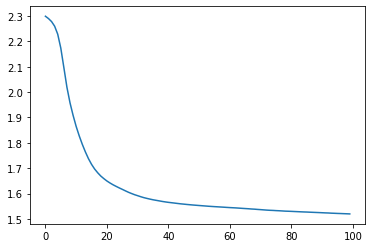

In [ ]:
plt.plot(range(100), avg_test_loss)

(array([151.,   0., 116.,   0.,   0., 143.,   0., 109.,   0.,  22.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

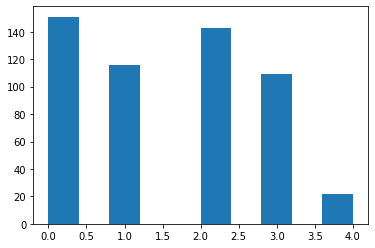

In [ ]:
a = np.array(torch.argmax(model(X_test).squeeze(), axis = 1))
plt.hist(a)

In [ ]:
gs = model
y_prd = np.array(torch.argmax(model(X_test).squeeze(), axis = 1))

Class.append("MLP")
Best_Parameters.append(gs.parameters)
Precision.append(precision_score( y_test, y_prd, average = "weighted"))
Recall.append(recall_score( y_test, y_prd, average = "weighted"))
Balanced_Acc.append(balanced_accuracy_score(y_test, y_prd))
Kappa.append(cohen_kappa_score(y_test, y_prd))
Accuracy.append(accuracy_score(y_test, y_prd))
F1.append(f1_score(y_test, y_prd,  average = "weighted"))
Confusion_Matrix.append(confusion_matrix(y_test, y_prd))

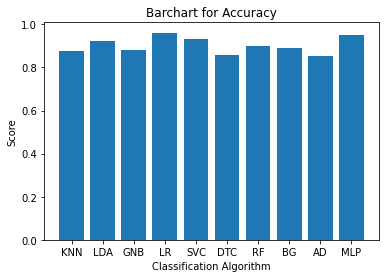

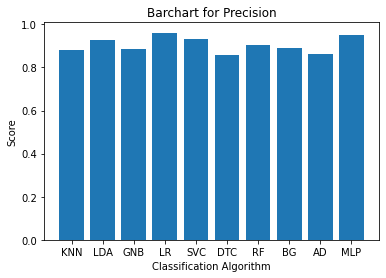

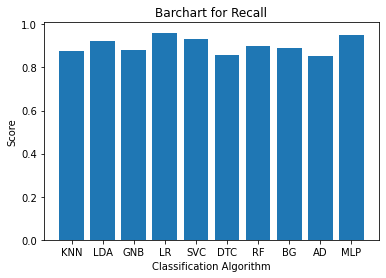

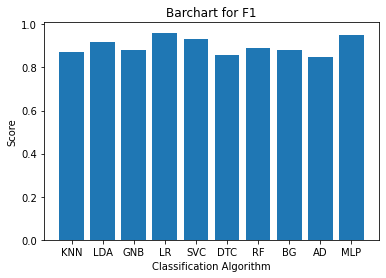

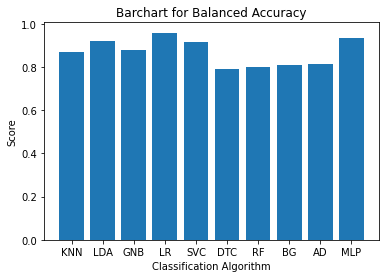

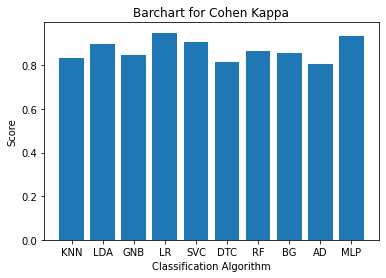

In [ ]:
comp = pd.DataFrame()
comp["Classification"] = Class
comp["Best Parameters"] = Best_Parameters
comp["Precision"] = Precision
comp["Recall"] = Recall
comp["Accuracy"] = Accuracy
comp["F1"] = F1  ##check f score per class, if imbalanced, class weighting
comp["Balanced Accuracy"] = Balanced_Acc
comp["Cohen Kappa"] = Kappa
comp["Confusion Matrix"] = Confusion_Matrix
plt.bar(x = comp["Classification"],height = comp["Accuracy"])
plt.title("Barchart for Accuracy")
plt.xlabel("Classification Algorithm")
plt.ylabel("Score")
plt.show()
plt.bar(x = comp["Classification"],height = comp["Precision"])
plt.title("Barchart for Precision")
plt.xlabel("Classification Algorithm")
plt.ylabel("Score")
plt.show()
plt.bar(x = comp["Classification"],height = comp["Recall"])
plt.title("Barchart for Recall")
plt.xlabel("Classification Algorithm")
plt.ylabel("Score")
plt.show()
plt.bar(x = comp["Classification"],height = comp["F1"])
plt.title("Barchart for F1")
plt.xlabel("Classification Algorithm")
plt.ylabel("Score")
plt.show()
plt.bar(x = comp["Classification"],height = comp["Balanced Accuracy"])
plt.title("Barchart for Balanced Accuracy")
plt.xlabel("Classification Algorithm")
plt.ylabel("Score")
plt.show()
plt.bar(x = comp["Classification"],height = comp["Cohen Kappa"])
plt.title("Barchart for Cohen Kappa")
plt.xlabel("Classification Algorithm")
plt.ylabel("Score")
plt.show()

In [ ]:
comp.iloc[comp['F1'].idxmax(),]

Classification                                                      LR
Best Parameters                                      {'penalty': 'l2'}
Precision                                                     0.961069
Recall                                                        0.961183
Accuracy                                                      0.961183
F1                                                            0.961057
Balanced Accuracy                                             0.959704
Cohen Kappa                                                   0.949362
Confusion Matrix     [[145, 0, 0, 3, 0], [1, 111, 0, 0, 0], [1, 0, ...
Name: 3, dtype: object

In [ ]:
comp.iloc[comp["Balanced Accuracy"].idxmax(),]

Classification                                                      LR
Best Parameters                                      {'penalty': 'l2'}
Precision                                                     0.961069
Recall                                                        0.961183
Accuracy                                                      0.961183
F1                                                            0.961057
Balanced Accuracy                                             0.959704
Cohen Kappa                                                   0.949362
Confusion Matrix     [[145, 0, 0, 3, 0], [1, 111, 0, 0, 0], [1, 0, ...
Name: 3, dtype: object

In [ ]:
comp.iloc[comp["Cohen Kappa"].idxmax(),]

Classification                                                      LR
Best Parameters                                      {'penalty': 'l2'}
Precision                                                     0.961069
Recall                                                        0.961183
Accuracy                                                      0.961183
F1                                                            0.961057
Balanced Accuracy                                             0.959704
Cohen Kappa                                                   0.949362
Confusion Matrix     [[145, 0, 0, 3, 0], [1, 111, 0, 0, 0], [1, 0, ...
Name: 3, dtype: object